# **Spearman Rank Test**

#### **When the Pearson correlation fails**

## **1. What is the test telling?**

The Spearman rank test provides an objective, quantitative measure of the strength and direction of any monotonic relationship, and whether that observed relationship is statistically significant.

### **Formal definition**

Suppose we have a sample of $n$ pairs $(x_{1},y_{1}),\ldots,(x_{n},y_{n})$ generated by two continuous variables $X$ and $Y$. Since the distributions are continuous, we will work under the assumption that there are no ties (if any exist, the implicated data points are removed). Let the ranks be:

- $R_{i}$: rank of $x_{i}$ within the sample $x_{1},\ldots,x_{n}$,
- $S_{i}$: rank of $y_{i}$ within the sample $y_{1},\ldots,y_{n}$.

Let us now consider a new sample of $n$ pairs formed by the ranks: $(R_{1},S_{1}),\ldots$, $(R_{n},S_{n})$. We will call the *Spearman's rank coefficient* $U_{s}$ the sample correlation coefficient of these last $n$ pairs.

The aim of the Kruskal-Wallis test is to the determine whether
$$ H_0:\text{There is NO monotonic correlation between } X \text{ and } Y$$
$$ \text{vs} $$
$$ H_1:\text{There is a monotonic correlation between } X \text{ and } Y$$

If you are not familiar with the coming notation or with hypothesis tests, I would highly recommend you to check this other [guide for chi-square test](https://www.linkedin.com/feed/update/urn:li:activity:7369022608576622592?utm_source=share&utm_medium=member_desktop&rcm=ACoAAFgPA70BRK5510H_8uDQmRtSasGuzVq97Pw) where I explain them in more detail before reading the rest of this section.

To do so, we set a significance level $\alpha$ (usual values are 0.95, 0.975 and 0.99) and compute the associated statistic with this test:

$$ r_s = 1 -\frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)},\quad\text{where } d_i=R_i-S_i$$

The Spearman's rank correlation coefficient satisfies $r_s \in [-1, 1]$ and is used to measure the monotonic association between the variables $X$ and $Y$. As is the case with the sample correlation coefficient, a value of $U_s$ close to 1 indicates a strong increasing relationship, and a value close to –1 indicates a decreasing relationship. Since the null hypothesis is that of no correlation or lack of association, a sample value that deviates significantly from zero will lead us to reject the null hypothesis. Therefore, we can reject the null hypothesis at a significance level $\alpha$ if

$$ |r_s| > C_\alpha,$$

where, if R_s is the random variable associated with $r_s$, $C_\alpha$ is the critical value such that $P(|R_s| > C_\alpha) = \alpha$. Equivalently, we can only reject $H_0$ if the p-value $<\alpha$.

Finding the constant $C_\alpha$ is a combinatorial problem, and for small samples, we can check this [table](https://webspace.ship.edu/pgmarr/geo441/tables/spearman%20ranked%20correlation%20table.pdf). For large samples, the approximation of $r_s$ by the normal distribution $N(0, \frac{1}{n-1})$ can be used. Another approach would be using Python packages like Pandas (`DataFrame.corr(method='spearman')`) or `scipy.stats` via the `spearmanr` function, which we will we used in our examples later.

### **A toy example**

For instance, a teacher wants to know if there is a monotonic relationship between the number of hours a student spends studying and their final exam score. They collect data from 6 students:

| Student | Hours Studied ($X$) | Exam Score ($Y$) |
|---------|-------------------|----------------|
| A       | 5                 | 70             |
| B       | 12                | 90             |
| C       | 3                 | 60             |
| D       | 8                 | 80             |
| E       | 10                | 85             |
| F       | 4                 | 75             |

#### **Step 1: State the Hypotheses**

- **Null Hypothesis ($H_0$):** There is no monotonic correlation between hours studied and exam score.

- **Alternative Hypothesis ($H_1$):** There is a monotonic correlation between hours studied and exam score.

#### **Step 2: Assign Ranks**
We need to rank the data for both variables from smallest to largest (1 is the smallest rank).

**a) Rank the X values (Hours Studied):**

- Raw Data: 5, 12, 3, 8, 10, 4

- Sorted: 3 (rank 1), 4 (rank 2), 5 (rank 3), 8 (rank 4), 10 (rank 5), 12 (rank 6)

**b) Rank the Y values (Exam Score):**

- Raw Data: 70, 90, 60, 80, 85, 75

- Sorted: 60 (rank 1), 70 (rank 2), 75 (rank 3), 80 (rank 4), 85 (rank 5), 90 (rank 6)

**c) Create a new table with the ranks:**

| Student | Hours ($X$) | Rank ($R_i$) | Score ($Y$) | Rank ($S_i$) |
|---------|-----------|-----------|-----------|-----------|
| A       | 5         | 3         | 70        | 2         |
| B       | 12        | 6         | 90        | 6         |
| C       | 3         | 1         | 60        | 1         |
| D       | 8         | 4         | 80        | 4         |
| E       | 10        | 5         | 85        | 5         |
| F       | 4         | 2         | 75        | 3         |

#### **Step 3: Calculate the Difference in Ranks: $d$ and $d^2$**

| Student | $R_i$ | $S_i$ | $d$  | $d^2$ |
|---------|----|----|----|----|
| A       | 3  | 2  | 1  | 1  |
| B       | 6  | 6  | 0  | 0  |
| C       | 1  | 1  | 0  | 0  |
| D       | 4  | 4  | 0  | 0  |
| E       | 5  | 5  | 0  | 0  |
| F       | 2  | 3  | -1 | 1  |
| **Sum** |    |    |    | **2**  |

#### **Step 4: Calculate Spearman's Rank Correlation Coefficient**

Use the formula:

$$ r_s = 1 -\frac{6\sum_{i=1}^n d_i^2}{n(n^2-1)} = 1-\frac{6\times2}{6(6^2-1)}\approx 0.943 $$

#### **Step 5: Interpret the Result**

Our value of **0.943** is very close to +1. This indicates a **very strong positive monotonic relationship**. As the number of hours studied increases, the exam score also tends to increase.

### **Step 6: Determine Significance (Optional, with a Critical Value Table)**

To determine if this result is statistically significant (and not due to chance), we compare it to a critical value from a Spearman's Rank Correlation table.

For $n=6$ and a significance level of $\alpha = 0.05$ we get a critical value of **0.886**. Since **0.943 > 0.0886**. Therefore, we **reject the null hypothesis** and, as a consequence, there is statistically significant evidence at the 0.05 significance level to conclude that a strong positive monotonic correlation exists between hours studied and exam score.

## **2. When to prefer the Spearman Rank Test**

You would run the Spearman rank test in the following scenarios:

### **a) To quantify a visual pattern and assess significance**

You've made a scatter plot, and the points show a clear upward or downward trend (it doesn't have to be a straight line). When you need to move from a visual hunch ("it looks like...") to a defensible, quantitative conclusion ("we can say with confidence that..."), then this test comes handy.

### **b) When the relationship is monotonic but not linear**

This is a key strength of Spearman over [Pearson's correlation](https://github.com/jantohidalca/LinkedIn-Guides/blob/main/2025/Sep%20-%20Dec/pearson_correlation_test.ipynb). A monotonic relationship is one where the variables tend to move in the same direction (both increase or both decrease), but not necessarily at a constant rate.

To illustrate this two scenarios, let's analyze a dataset that contains, among other attributes, the gas miles per gallon (`mpg`) and the `displacement` of 392 vehicles. This dataset can be accesed via R easily. However, we will import it as a csv file from GitHub, since we want to work with Python.

In [ ]:
# Import the dependencies we will need throughout this guide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# Import the data for the example
dataset_url = 'https://raw.githubusercontent.com/intro-stat-learning/ISLP_labs/refs/heads/stable/Auto.csv'

mpg_df = pd.read_csv(
    dataset_url,
    usecols=[0,2])

mpg_df.head()

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0


First we will plot a scatter plot to study the relationship between these two variables.

<Figure size 1000x600 with 0 Axes>

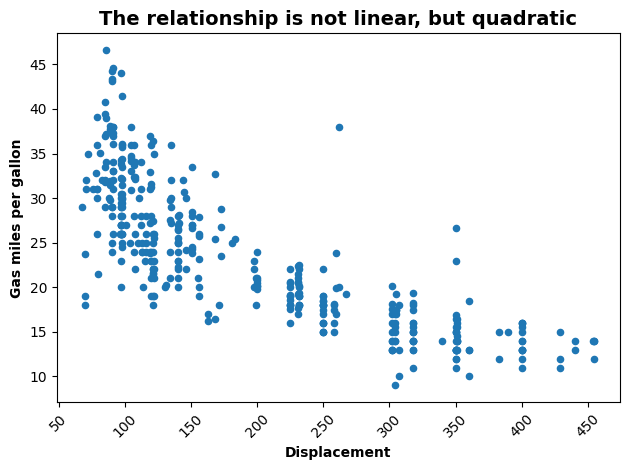

In [3]:
# Create the plot
plt.figure(figsize=(10, 6))
mpg_df.plot.scatter(x='displacement', y='mpg', legend=False)
plt.title('The relationship is not linear, but quadratic', fontsize=14, fontweight='bold')
plt.xlabel('Displacement', fontweight='bold')
plt.ylabel('Gas miles per gallon', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is notable that the relationship seems to be quadratic rather than linear. Spearman rank test does not confirm whether a relationship is quadratic or not, but whether it has an upward or downward trend, like the one we observe in the plot. 

As I mentioned previously, in Python we have two common approaches to compute the stadistic:

**1. via `pandas`**

In [4]:
mpg_df.corr(method='spearman')

,mpg,displacement
mpg,1.000000,-0.855234
displacement,-0.855234,1.000000


Here we obtain $r_s\approx -0.855$, so the more displacement, the less gas miles per gallon. Also, the correlation is negative as $r_s$ is near from -1. Despite this value, we can't test the hypothesis and it might happen the relationship is not significant. To address the issue, we could apply the second approach:

**2. via `scipy.stats`**

In [5]:
statistic, p_value = spearmanr(mpg_df['mpg'], mpg_df['displacement'])
statistic, p_value

(np.float64(-0.8552335882841172), np.float64(2.195777599322618e-113))

By using this Python function, we do not only get the statistic from the spearman rank test, but also the associated p_value. Since the latter is practicaly 0, we can reject the null hypothesis of no monotonicity at a significance level $\alpha=0.05$.

Additionally, we can also compare the test with the performance of the Pearson coeffient:

In [6]:
mpg_df.corr(method='pearson')

,mpg,displacement
mpg,1.000000,-0.805127
displacement,-0.805127,1.000000


As we can see, it is a bit lower in absolute value than the one from the Spearman rank test: $|-0.805|<|-0.855|$. This is because Pearson coefficient tends to -1 or 1 when the relationship is linear; but to 0 when it is not the case.

### **c) When the data violates the assumptions of Pearson's correlation**
Apart from linearity, which is the most common case, Pearson's test also requires:

1. Both variables to be numerical type.

2. Both variables to be approximately normally distributed.

3. Homoscedasticity (constant variance of one variable across the range of the other).

On the other hand, the Spearman test is non-parametric and makes none of these assumptions. It's robust to outliers and non-normal distributions. In conclusion, the latter is prefered to the former when the data is skewed, has outliers, or is on a different scale (e.g., one variable is ordinal, the other is interval).

### **d) When the data is ordinal (Ranked)**
If the data is inherently ranks (e.g., customer satisfaction rankings, order of finish in a race, league standings), Spearman is the natural choice. Pearson's correlation is not valid for ordinal data.

### **e) For subtle effects that are not visually obvious**
With large sample sizes, a weak monotonic trend might be visually imperceptible in a scatter plot that looks like a shapeless cloud of points.

For instance, imagine a researcher is investigating the relationship between daily screen time (hours) and self-reported productivity on a 10-point scale based on 1000 observations.

The key in creating this data is to have a massive amount of random "noise" overshadowing a very slight systematic trend. If $X$ represents the screen time and $Y$ the productiviy, I will model both variables to follow this dynamic:
$$ Y = -0.05X + \varepsilon, $$
where $\varepsilon$ is a some noise added to perturb the values and which actually follows a normal distribution with mean equal to 0 and standard deviation equal to 1.5.

In [9]:
# Set a seed for reproducibility so we get the same "subtle" effect
np.random.seed(42)  # The answer to a subtle universe

# Number of samples
n_samples = 1000

# Generate the primary variable: Screen Time (hours)
# Let's assume a roughly normal distribution centered around 8 hours.
screen_time = np.random.normal(loc=8.0, scale=2.5, size=n_samples)
# Clip unrealistic values (e.g., negative hours or extremely high ones)
screen_time = np.clip(screen_time, 1, 16)

# 1. Create the "true" underlying trend: a very slight decrease
# This is the signal we want to hide in the noise.
true_trend = -0.05 * screen_time  # This creates a very weak negative linear trend

# 2. Add the tiny signal (the true_trend) to the massive noise
# We scale it down to make it very subtle and add the base value of 6.
productivity = 6.0 + true_trend + np.random.normal(loc=0.0, scale=1.5, size=n_samples)

# 3. Clip values to fit the intended 1-10 scale
productivity = np.clip(productivity, 1, 10)

# Create the DataFrame
df = pd.DataFrame({
    'Screen_Time_Hrs': screen_time,
    'Perceived_Productivity': productivity,
    'True_Trend': true_trend
})

df.head()

,Screen_Time_Hrs,Perceived_Productivity,True_Trend
0,9.241785,7.636944,-0.462089
1,7.654339,7.004234,-0.382717
2,9.619221,5.608484,-0.480961
3,11.807575,4.439216,-0.590379
4,7.414617,6.676604,-0.370731


First, we plot the data without noise:

<Figure size 1000x600 with 0 Axes>

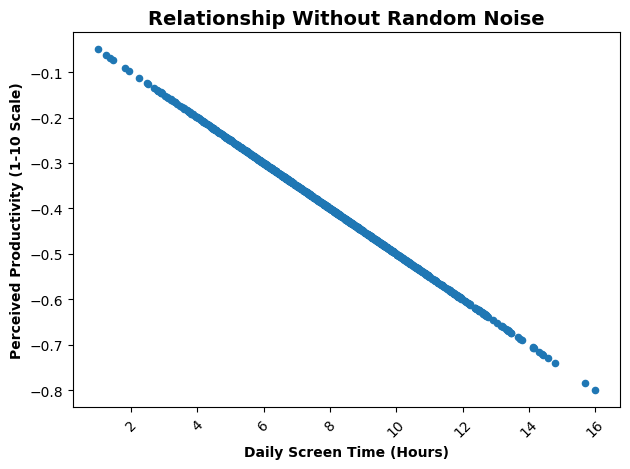

In [10]:
# Create the plot without the random noise
plt.figure(figsize=(10, 6))
df.plot.scatter(x='Screen_Time_Hrs', y='True_Trend', legend=False)
plt.title('Relationship Without Random Noise', fontsize=14, fontweight='bold')
plt.xlabel('Daily Screen Time (Hours)', fontweight='bold')
plt.ylabel('Perceived Productivity (1-10 Scale)', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see the actual trend is linear. However, the plot changes drastically when the random noise is included:

<Figure size 1000x600 with 0 Axes>

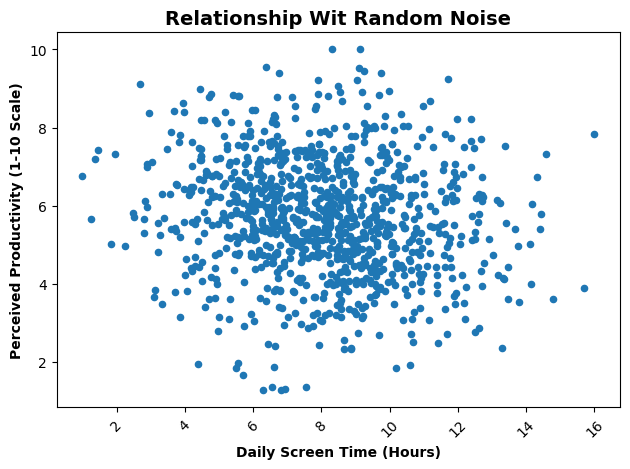

In [11]:
# Create the plot including the random noise
plt.figure(figsize=(10, 6))
df.plot.scatter(x='Screen_Time_Hrs', y='Perceived_Productivity', legend=False)
plt.title('Relationship Wit Random Noise', fontsize=14, fontweight='bold')
plt.xlabel('Daily Screen Time (Hours)', fontweight='bold')
plt.ylabel('Perceived Productivity (1-10 Scale)', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The data points form a massive, wide cloud with no obvious pattern. It looks essentially random. 

Despite the plot suggests no relationship, the test tells the true story:

In [12]:
# Perform the Spearman Rank Test
statistic, p_value = spearmanr(df['Screen_Time_Hrs'], df['Perceived_Productivity'])
statistic, p_value

(np.float64(-0.140121806542172), np.float64(8.689274313120026e-06))

In this case, the Spearman test, with its power derived from the large sample size ($n=1000$), manages to detect the tiny, systematic signal buried within the noise. Since the p-value is practically zero, it allows us to confirm the downward trend.

This example illustrates an extremely common situation in *big data* fields like sociology, medicine, or economics, where minute effects can be detected with large enough samples, but their practical importance must be carefully judged.